In [34]:
import pandas as pd 
import numpy as np

# df = pd.read_csv("https://gist.githubusercontent.com/yuzhang21/7a3fc3afba92196c5f653f5e70d1b0a5/raw/429a950019f928b337013c15ee9d7909d0cc2f97/BostonHousing01.csv")

In [8]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [11]:
df.shape

(374, 14)

In [12]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [17]:
df=df.rename(columns={'medv':'Price'}) # Rename 

In [18]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'Price'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     374 non-null    float64
 1   zn       374 non-null    float64
 2   indus    374 non-null    float64
 3   chas     374 non-null    int64  
 4   nox      374 non-null    float64
 5   rm       374 non-null    float64
 6   age      374 non-null    float64
 7   dis      374 non-null    float64
 8   rad      374 non-null    int64  
 9   tax      374 non-null    int64  
 10  ptratio  374 non-null    float64
 11  b        374 non-null    float64
 12  lstat    374 non-null    float64
 13  Price    374 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 41.0 KB


In [27]:
# Independent and Depedent Split 
X = df.iloc[:,:-1] # Independent
y = df.iloc[:,-1] # Dependent 

In [55]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,y)

LinearRegression()

In [32]:
from sklearn.model_selection import cross_val_score
mse = cross_val_score(regressor,X,y,scoring='neg_mean_squared_error',cv=5)
print(mse)

[ -6.77496071  -7.60572341 -26.8995839   -9.38756066  -9.68658579]


In [36]:
np.mean(mse)

-12.070882894355847

# Ridge Regression 

In [41]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge

Ridge()

In [38]:
# Random Search CV we can also Use

from sklearn.model_selection import GridSearchCV



In [42]:
parameters={'alpha':[1e-15,1e-3,1e-2,1,5,10,20,30,40,50]}

In [43]:
ridge_regressor = GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5,verbose=1)
ridge_regressor.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 0.001, 0.01, 1, 5, 10, 20, 30, 40,
                                   50]},
             scoring='neg_mean_squared_error', verbose=1)

In [44]:
print(ridge_regressor.best_params_)

{'alpha': 5}


In [45]:
print(ridge_regressor.best_score_)

-11.804968889540154


# Lasso Regression


In [47]:
from sklearn.linear_model import Lasso

lasso = Lasso()

lasso_regressor = GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5,verbose=1)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.337e+03, tolerance: 2.301e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.352e+03, tolerance: 2.286e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

{'alpha': 0.01}
-11.822967813594179


In [48]:
from sklearn.linear_model import ElasticNet

In [49]:
elasticnet = ElasticNet()

elasticnet = GridSearchCV(elasticnet,parameters,scoring='neg_mean_squared_error',cv=5,verbose=1)

elasticnet.fit(X,y)
print(elasticnet.best_params_)
print(elasticnet.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'alpha': 0.01}
-11.768514660983271


C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.301e+03, tolerance: 2.301e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.368e+03, tolerance: 2.286e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

In [51]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [56]:
prediction_lasso = lasso_regressor.predict(X_test)
prediction_ridge = ridge_regressor.predict(X_test)
prediction_linear = regressor.predict(X_test)

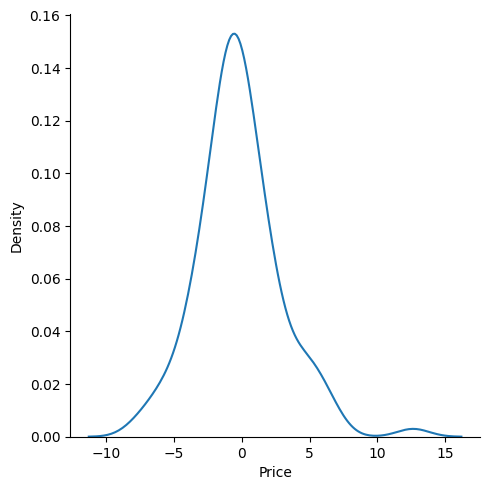

In [59]:
import seaborn as sns
sns.displot(y_test-prediction_lasso,kind='kde')

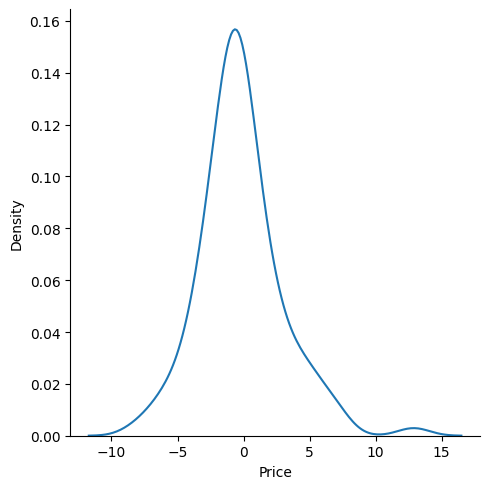

In [60]:
sns.displot(y_test-prediction_ridge,kind='kde')

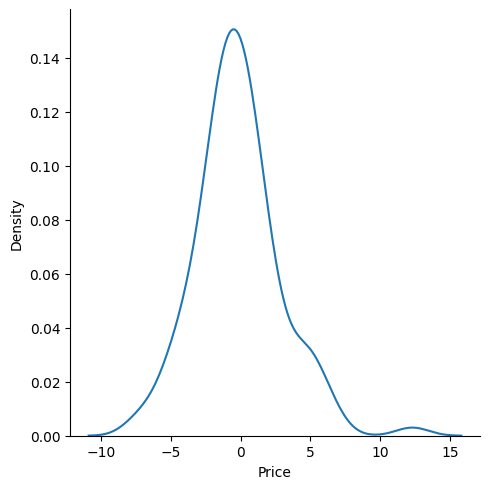

In [61]:
sns.displot(y_test-prediction_linear,kind='kde')

In [62]:
# When we are getting a normal Distribution in respective to error!!!!
# If it is not normally Distributed it is not good
from sklearn.metrics import r2_score

r2_score(y_test,prediction_linear)

0.8545730069012774

In [63]:
r2_score(y_test,prediction_lasso)


0.8512184207146795

In [64]:
r2_score(y_test,prediction_ridge)

0.8460177045426319